#**Analysis of System Usability Scale (SUS) scores** 

In [3]:
#!pip install scikit_posthocs
#!pip install pingouin

In [4]:
#Import libraries
import pandas as pd
#scikit_posthocs: Python package which provides post hoc tests for pairwise multiple comparisons https://scikit-posthocs.readthedocs.io/en/latest/
import scikit_posthocs as sp 
#pingouin is an open-source statistical package for calculating Reliability and consistency https://pingouin-stats.org/build/html/index.html
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
#Read file containing SUS scores
sus=pd.read_csv("SUS.csv",sep=";")

In [6]:
sus.head()

,Category,1. I think that I would like to use this system frequently,2. I found the system unnecessarily complex,3. I thought the system was easy to use,4. I think that I would need the support of a technical person to be able to use this system,5. I found the various functions in this system were well integrated,6. I thought there was too much inconsistency in this system,7. I would imagine that most people would learn to use this system very quickly,8. I found the system very cumbersome to use,9. I felt very confident using the system,10. I needed to learn a lot of things before I could get going with this system,SUS score
0,Novice Users,3,3,3,2,3,1,3,3,3,1,62.5
1,Novice Users,3,3,3,4,4,2,4,4,3,4,85.0
2,Novice Users,2,4,4,4,3,3,2,3,3,3,77.5
3,Novice Users,3,3,3,3,1,1,3,4,4,4,72.5
4,Novice Users,0,0,3,1,0,0,0,0,0,1,12.5


In [7]:
# Function to calculate Cronbach's Alpha value (coefficient measuring the reliability of a set of survey items)
pg.cronbach_alpha(data=sus.iloc[:,1:11])

(0.8473114988266504, array([0.751, 0.917]))

In [9]:
#Median System Usability Scale (SUS) scores for each item and testing group
sus.groupby(['Category']).median().T

Category,Expert Familiar Users,Expert Unfamiliar Users,Novice Users
1. I think that I would like to use this system frequently,3.00,3.0,3.0
2. I found the system unnecessarily complex,1.50,2.0,3.0
3. I thought the system was easy to use,3.00,3.5,3.0
4. I think that I would need the support of a technical person to be able to use this system,3.00,4.0,2.5
5. I found the various functions in this system were well integrated,2.00,3.0,3.0
6. I thought there was too much inconsistency in this system,2.50,2.5,2.0
7. I would imagine that most people would learn to use this system very quickly,1.00,2.5,3.0
8. I found the system very cumbersome to use,2.00,3.5,3.0
9. I felt very confident using the system,2.00,3.0,3.0
10. I needed to learn a lot of things before I could get going with this system,3.00,4.0,3.0


In [64]:
# Function to calculate Kruskal-Wallis (non-parametric test to check whether a data set comes from the same population)
def kruskal_wallis(item):
  kruskal_result=stats.kruskal(sus[sus["Category"]=="Novice Users"][item], sus[sus["Category"]=="Expert Unfamiliar Users"][item], sus[sus["Category"]=="Expert Familiar Users"][item])
  return kruskal_result

In [66]:
# Run the Kruskal-Wallis test for each item split by test group
mydataframe = pd.DataFrame()
for item in sus.columns[1:]:
    #kruskal_wallis(item)
    new_row = {'item':item, 'statistic':kruskal_wallis(item)[0], 'pvalue':kruskal_wallis(item)[1]}
    mydataframe = mydataframe.append(new_row, ignore_index=True)
mydataframe
# We can observe that only items 7 and 8 are different at α = .05

,item,statistic,pvalue
0,1. I think that I would like to use this syste...,1.200658,0.548631
1,2. I found the system unnecessarily complex,5.557985,0.062101
2,3. I thought the system was easy to use,3.301476,0.191908
3,4. I think that I would need the support of a ...,5.321359,0.069901
4,5. I found the various functions in this syste...,2.583956,0.274727
5,6. I thought there was too much inconsistency ...,0.798959,0.670669
6,7. I would imagine that most people would lear...,8.681620,0.013026
7,8. I found the system very cumbersome to use,6.680804,0.035423
8,9. I felt very confident using the system,1.331413,0.513910
9,10. I needed to learn a lot of things before I...,2.811328,0.245204


In [44]:
# Application of Dunn's test (pairwise comparisons to detect whether groups are statistically different) to item 7. 
x = [sus[sus["Category"]=="Novice Users"]["7. I would imagine that most people would learn to use this system very quickly"], sus[sus["Category"]=="Expert Unfamiliar Users"]["7. I would imagine that most people would learn to use this system very quickly"], sus[sus["Category"]=="Expert Familiar Users"]["7. I would imagine that most people would learn to use this system very quickly"]]
sp.posthoc_dunn(x, p_adjust = 'bonferroni')
# "Novice Users" and "Expert Familiar Users" are different for item 7 at α = .05

,1,2,3
1,1.000000,0.983599,0.011334
2,0.983599,1.000000,0.165446
3,0.011334,0.165446,1.000000


In [45]:
# Application of Dunn's test (pairwise comparisons to detect whether groups are statistically different) to item 8. 
x = [sus[sus["Category"]=="Novice Users"]["8. I found the system very cumbersome to use"], sus[sus["Category"]=="Expert Unfamiliar Users"]["8. I found the system very cumbersome to use"], sus[sus["Category"]=="Expert Familiar Users"]["8. I found the system very cumbersome to use"]]
sp.posthoc_dunn(x, p_adjust = 'bonferroni')
# Groups "Expert Unfamiliar Users" and "Expert Familiar Users" are different for item 8 at α = .05

,1,2,3
1,1.000000,1.000000,0.316777
2,1.000000,1.000000,0.031898
3,0.316777,0.031898,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


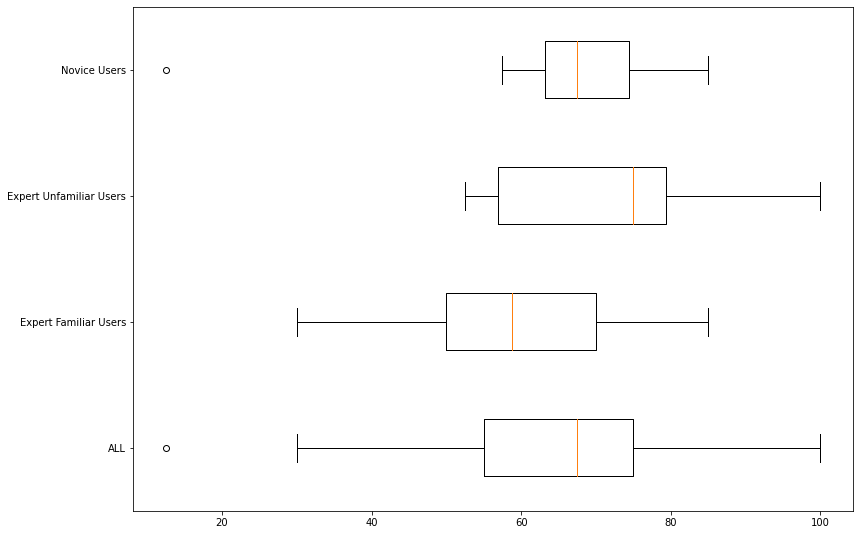

In [46]:
# Box plots of System Usability Scale (SUS) scores for each testing group
# Spliting testing grups
data_1 = sus["SUS score"]
data_2 = sus[sus["Category"]=="Expert Familiar Users"]["SUS score"]
data_3 = sus[sus["Category"]=="Expert Unfamiliar Users"]["SUS score"]
data_4 = sus[sus["Category"]=="Novice Users"]["SUS score"]
data = [data_1, data_2, data_3, data_4]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data,vert = 0)
ax.set_yticklabels(['ALL', 'Expert Familiar Users','Expert Unfamiliar Users', 'Novice Users'])
# show plot
plt.show()